In [101]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style


In [59]:
data=pd.read_csv('C:/Users/2ez4rtz/Desktop/Github repository/materials/python/student-mat.csv',sep=";")

In [60]:
print(data.head)

<bound method NDFrame.head of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
5       GP   M   16       U     LE3       T     4     3  services     other   
6       GP   M   16       U     LE3       T     2     2     other     other   
7       GP   F   17       U     GT3       A     4     4     other   teacher   
8       GP   M   15       U     LE3       A     3     2  services     other   
9       GP   M   15       U     GT3       T     3     4     other     other   
10      GP   F   15       U     GT3       T     4     4   teacher    health   
11      GP   F   15   

In [61]:
data=data[['G1','G2','G3','studytime','failures','absences']]
print(data.head)

<bound method NDFrame.head of      G1  G2  G3  studytime  failures  absences
0     5   6   6          2         0         6
1     5   5   6          2         0         4
2     7   8  10          2         3        10
3    15  14  15          3         0         2
4     6  10  10          2         0         4
5    15  15  15          2         0        10
6    12  12  11          2         0         0
7     6   5   6          2         0         6
8    16  18  19          2         0         0
9    14  15  15          2         0         0
10   10   8   9          2         0         0
11   10  12  12          3         0         4
12   14  14  14          1         0         2
13   10  10  11          2         0         2
14   14  16  16          3         0         0
15   14  14  14          1         0         4
16   13  14  14          3         0         6
17    8  10  10          2         0         4
18    6   5   5          1         3        16
19    8  10  10          1    

In [70]:
predict='G3'
print(predict)

G3


In [69]:
x=np.array(data.drop([predict],1))
y=np.array(data[predict])
print('this is X',x)
print('y=',y)

this is X [[ 5  6  2  0  6]
 [ 5  5  2  0  4]
 [ 7  8  2  3 10]
 ...
 [10  8  1  3  3]
 [11 12  1  0  0]
 [ 8  9  1  0  5]]
y= [ 6  6 10 15 10 15 11  6 19 15  9 12 14 11 16 14 14 10  5 10 15 15 16 12
  8  8 11 15 11 11 12 17 16 12 15  6 18 15 11 13 11 12 18 11  9  6 11 20
 14  7 13 13 10 11 13 10 15 15  9 16 11 11  9  9 10 15 12  6  8 16 15 10
  5 14 11 10 10 11 10  5 12 11  6 15 10  8  6 14 10  7  8 18  6 10 14 10
 15 10 14  8  5 17 14  6 18 11  8 18 13 16 19 10 13 19  9 16 14 13  8 13
 15 15 13 13  8 12 11  9  0 18  0  0 12 11  0  0  0  0 12 15  0  9 11 13
  0 11  0 11  0 10  0 14 10  0 12  8 13 10 15 12  0  7  0 10  7 12 10 16
  0 14  0 16 10  0  9  9 11  6  9 11  8 12 17  8 12 11 11 15  9 10 13  9
  8 10 14 15 16 10 18 10 16 10 10  6 11  9  7 13 10  7  8 13 14  8 10 15
  4  8  8 10  6  0 17 13 14  7 15 12  9 12 14 11  9 13  6 10 13 12 11  0
 12 12  0 12  0 18 13  8  5 15  8 10  8  8 12  8 13 11 14  0 18  8 12  9
  0 17 10 11 10  0  9 14 11 14 10 12  9  9  8 10  8 10 12 10 11 11 19 

In [75]:
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,test_size=0.1)

In [76]:
linear=linear_model.LinearRegression()

In [77]:
linear.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
acc=linear.score(x_test,y_test)

In [83]:
print(acc)

0.8149571648289063


In [ ]:
if acc > best:
    best=acc
    with open("studentmodel.pickle",'wb') as f:
    pickle.dump(linear, f)
    pickle_in=open("studentmodel.pickle","rb")
    linear=pickle.load(pickle_in)

In [82]:
print('Co: \n',linear.coef_)
print('Intercept:\n',linear.intercept_)

Co: 
 [ 0.12645722  0.98769722 -0.12490912 -0.35236136  0.04169052]
Intercept:
 -1.3925441167962145


In [84]:
predictions=linear.predict(x_test)


In [99]:
for x in range(len(predictions)):
    print(np.round_(predictions[x]),x_test[x],y_test[x]) #np.around([0.37, 1.64], decimals=1)

6.0 [ 7  6  2  0 26] 6
7.0 [ 8  8  4  0 10] 8
18.0 [18 18  4  0  6] 18
8.0 [7 9 4 0 0] 0
12.0 [11 12  2  0 10] 13
-2.0 [4 0 1 2 0] 0
10.0 [12 10  2  0  8] 11
7.0 [ 9  7  2  1 20] 8
9.0 [10 10  4  0  0] 10
14.0 [12 14  1  0  0] 15
10.0 [10 10  2  0  4] 10
9.0 [9 9 1 0 6] 10
7.0 [ 6  8  1  3 16] 8
13.0 [12 13  2  0 14] 12
18.0 [17 17  2  0 13] 17
-2.0 [5 0 1 3 0] 0
15.0 [16 15  2  0  0] 15
10.0 [ 9 10  2  0  4] 10
17.0 [17 17  4  0  0] 18
7.0 [7 8 2 0 0] 0
16.0 [17 16  2  0  0] 17
12.0 [10  9  2  0 75] 9
5.0 [ 6  5  1  0 14] 5
8.0 [7 9 1 1 2] 8
15.0 [13 15  3  0  0] 15
7.0 [8 8 2 0 2] 8
8.0 [8 9 1 0 0] 8
14.0 [14 14  3  0  4] 14
12.0 [12 12  2  0 14] 12
12.0 [10 13  2  1  6] 13
9.0 [8 9 1 0 8] 10
11.0 [11 11  4  0  8] 10
12.0 [14 12  1  0  4] 11
9.0 [ 9 10  3  0  4] 10
5.0 [7 6 1 1 0] 0
14.0 [15 14  4  0  4] 14
11.0 [12 11  2  0 11] 11
6.0 [ 7  6  1  0 18] 6
9.0 [ 8 10  2  0  0] 12
13.0 [12 13  2  0  4] 13


Accuracy: 0.7026571638483448
Accuracy: 0.6503859603292403
Accuracy: 0.7705528685178971
Accuracy: 0.7654242832150762
Accuracy: 0.7887807417771383
Accuracy: 0.6342085335883454
Accuracy: 0.8775305092245745
Accuracy: 0.7539794662249841
Accuracy: 0.7326433669723376
Accuracy: 0.7452772401133333
Accuracy: 0.8266001707803557
Accuracy: 0.8167939452342243
Accuracy: 0.8808784276450722
Accuracy: 0.8418805398585533
Accuracy: 0.9198518394722837
Accuracy: 0.8342526487425287
Accuracy: 0.6981852695492677
Accuracy: 0.7502833406604086
Accuracy: 0.7899204530356055
Accuracy: 0.8034348829610933
-------------------------
Coefficient: 
 [ 0.15695745  0.97631042  0.03911899 -0.27309948 -0.2103677 ]
Intercept: 
 -1.5042439770922016
-------------------------
19.138383827015694 [17 18 21  0  2] 18
7.508543313387138 [8 9 0 3 1] 10
10.44795654868664 [11 11  3  0  3] 11
8.299259255519077 [10  9  2  0  3] 8
15.074038771502625 [15 15  0  0  2] 15
-1.7491228503089251 [5 0 0 3 1] 0
7.750148904441829 [7 9 0 0 3] 8
11.727

No handles with labels found to put in legend.


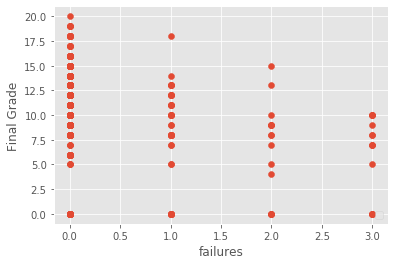

In [3]:
#Import Library
import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use("ggplot")

data = pd.read_csv('C:/Users/2ez4rtz/Desktop/Github repository/materials/python/student-mat.csv',sep=";")

predict = "G3"

data = data[["G1", "G2", "absences","failures", "studytime","G3"]]
data = shuffle(data) # Optional - shuffle the data

x = np.array(data.drop([predict], 1))
y =np.array(data[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)


# TRAIN MODEL MULTIPLE TIMES FOR BEST SCORE
best = 0
for _ in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)

# LOAD MODEL
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)


print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")

predicted= linear.predict(x_test)
for x in range(len(predicted)):
    print(predicted[x], x_test[x], y_test[x])


# Drawing and plotting model
plot = "failures"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()